In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

In [2]:
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('Barra weekly factors predict.csv',header = 0)
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data.head()

,date,Beta,Size,Momentum,Earnings_Yield,Growth,Book_to_Price,Liquidity,Leverage,Non_Linear_Size,Residual_Volatility
0,2005-01-14,0.003259,0.002909,0.000808,0.000192,0.000134,-0.000485,0.002329,0.004538,0.004428,-0.000264
1,2005-01-21,0.014898,0.001864,0.007461,0.001570,0.003283,0.006102,-0.003683,-0.001091,0.001649,-0.000742
2,2005-01-28,-0.004541,0.000674,-0.010653,0.006345,0.004828,-0.004468,0.005190,-0.001990,0.004402,0.011243
3,2005-02-04,-0.001971,-0.008872,-0.005712,0.006343,-0.001002,-0.002052,-0.006789,0.002507,0.001158,-0.000989
4,2005-02-18,0.008942,0.004434,0.010354,-0.000118,0.000327,0.006066,-0.000392,0.002002,0.003394,-0.004920


In [5]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [6]:
factor_cols = data.columns[:]
factor_cols

Index(['Beta', 'Size', 'Momentum', 'Earnings_Yield', 'Growth', 'Book_to_Price',
       'Liquidity', 'Leverage', 'Non_Linear_Size', 'Residual_Volatility'],
      dtype='object')

In [7]:
## set the training size
train_size = int(len(data) * 0.8)

## training and testing splited
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [8]:
for factor_col in factor_cols:
    # random forest
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    
    model.fit(train.drop(columns=[factor_col]), train[factor_col])
    prediction = model.predict(test.drop(columns=[factor_col]).tail(1))
    
    # actual value
    actual_value = test[factor_col].iloc[-1]
    
    # RMSE
    rmse = np.sqrt(mean_squared_error([actual_value], prediction))
    
    print(f'Predict {factor_col}: {prediction[0]}')
    print(f'Real value {factor_col}: {actual_value}')
    print(f'RMSE {factor_col}: {rmse}\n')

Predict Beta: -0.005107303420651667
Real value Beta: -0.0073151969654796
RMSE Beta: 0.0022078935448279335

Predict Size: 0.012864749360503221
Real value Size: 0.0091809069612258
RMSE Size: 0.0036838423992774216

Predict Momentum: 0.00774962321502699
Real value Momentum: 0.0099332889493037
RMSE Momentum: 0.00218366573427671

Predict Earnings_Yield: 0.013528406390111134
Real value Earnings_Yield: 0.0091963416996799
RMSE Earnings_Yield: 0.004332064690431235

Predict Growth: -0.0023696311369504892
Real value Growth: -0.0049579561338284
RMSE Growth: 0.002588324996877911

Predict Book_to_Price: 0.012515750708259488
Real value Book_to_Price: 0.0161763596741653
RMSE Book_to_Price: 0.003660608965905813

Predict Liquidity: 0.01080937683493867
Real value Liquidity: 0.0088314210941445
RMSE Liquidity: 0.001977955740794169

Predict Leverage: 0.007556075946436091
Real value Leverage: 0.0093055481735896
RMSE Leverage: 0.0017494722271535089

Predict Non_Linear_Size: 0.005631365624302672
Real value Non_

In [9]:
## Time series

# size of training dataset
train_size = int(len(data) * 0.8)

# train and test splited
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Beta values
train_beta = train[['Beta']]
test_beta = test[['Beta']]

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

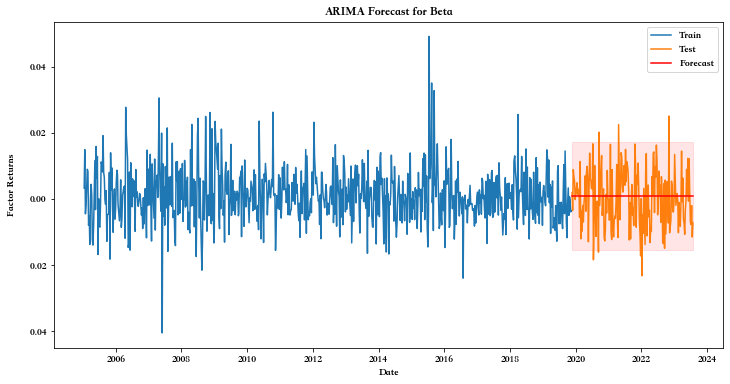

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)


Root Mean Squared Error (RMSE) for Beta: 0.008767894757099054


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

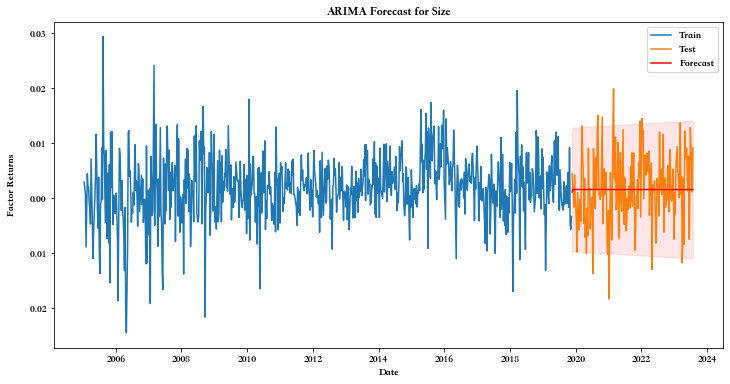

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)


Root Mean Squared Error (RMSE) for Size: 0.0063195084189359265


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

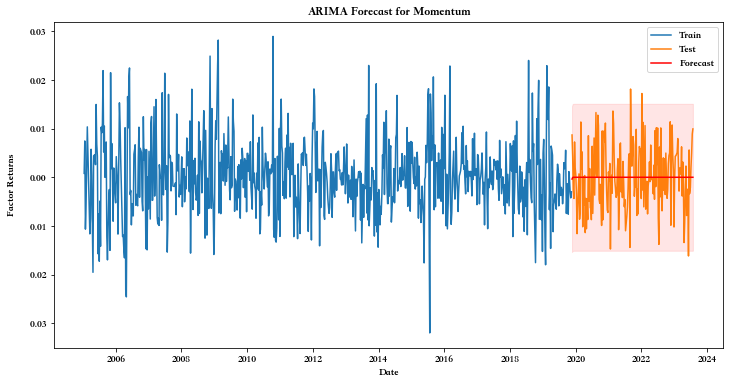

Root Mean Squared Error (RMSE) for Momentum: 0.006712373243297266


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmo

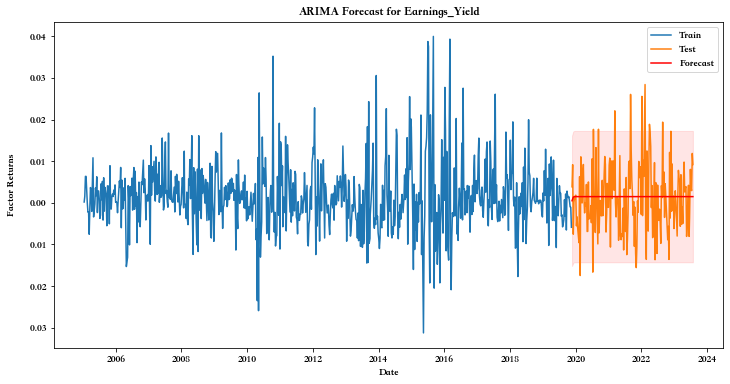

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)


Root Mean Squared Error (RMSE) for Earnings_Yield: 0.008344910725251767


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with a

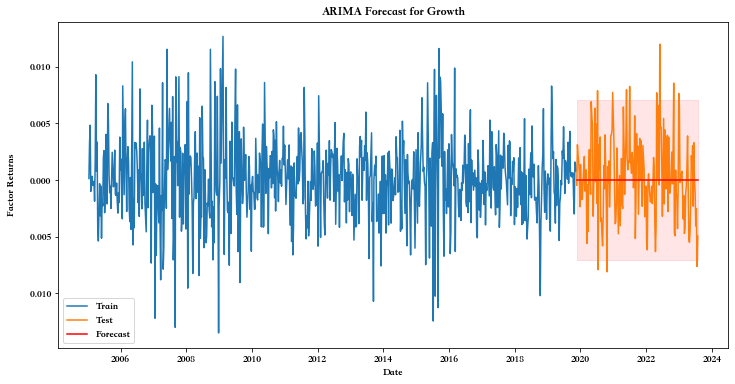

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)


Root Mean Squared Error (RMSE) for Growth: 0.003574522292665676


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

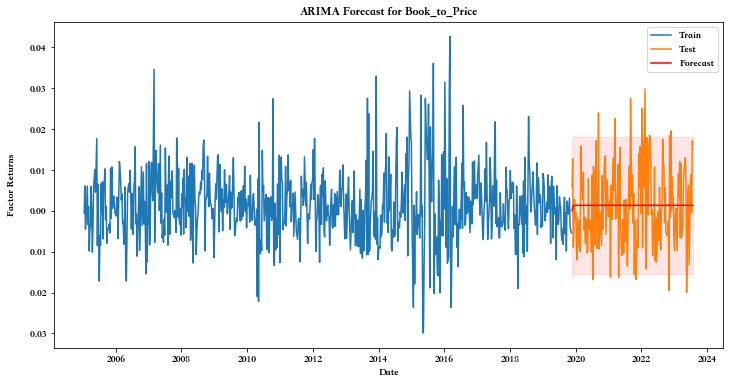

Root Mean Squared Error (RMSE) for Book_to_Price: 0.009837234797936892


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmo

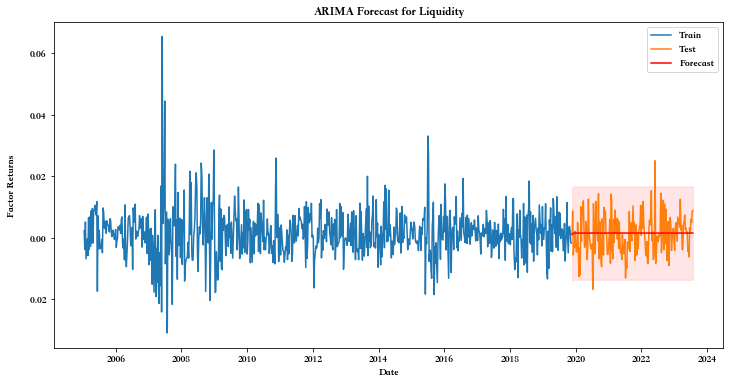

Root Mean Squared Error (RMSE) for Liquidity: 0.006385228818797376


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmo

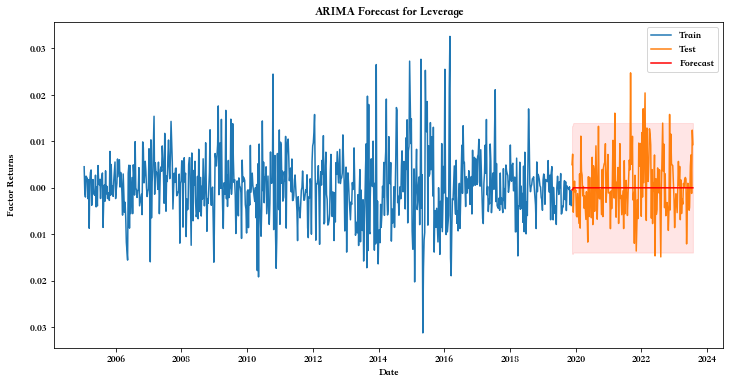

Root Mean Squared Error (RMSE) for Leverage: 0.006649625732113297


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmo

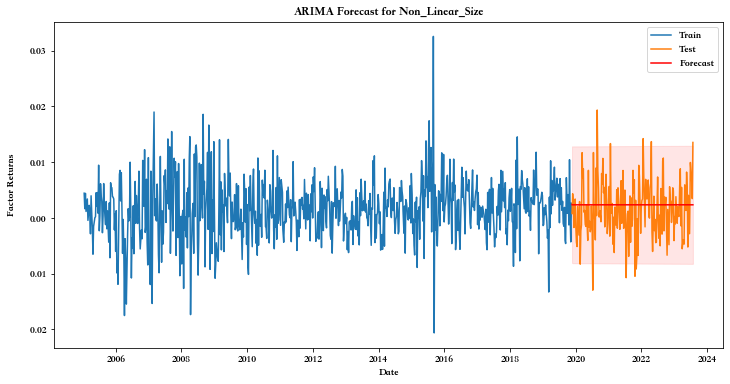

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)


Root Mean Squared Error (RMSE) for Non_Linear_Size: 0.0051642765831562115


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

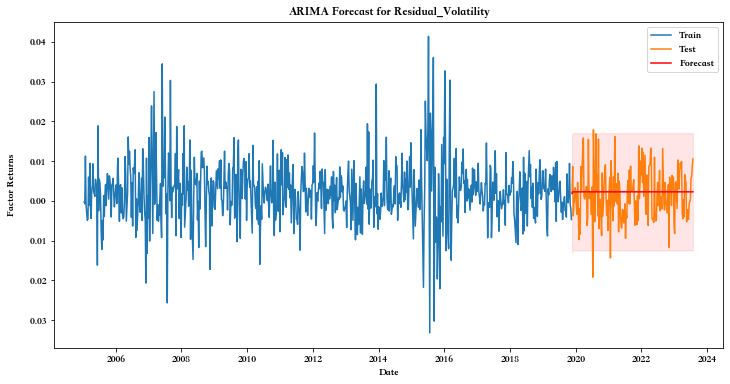

Root Mean Squared Error (RMSE) for Residual_Volatility: 0.00630084884802612
All Results:
                 Factor  Forecast  Lower_CI  Upper_CI
0                  Beta  0.000911 -0.015411  0.017233
1                  Beta  0.000911 -0.015411  0.017233
2                  Beta  0.000911 -0.015411  0.017233
3                  Beta  0.000911 -0.015411  0.017233
4                  Beta  0.000911 -0.015411  0.017233
5                  Size  0.001128 -0.010005  0.012261
6                  Size  0.001543 -0.009678  0.012765
7                  Size  0.001582 -0.009651  0.012815
8                  Size  0.001586 -0.009655  0.012826
9                  Size  0.001586 -0.009662  0.012834
10             Momentum -0.000365  -0.01535   0.01462
11             Momentum -0.000045 -0.015142  0.015052
12             Momentum -0.000005 -0.015104  0.015093
13             Momentum -0.000001 -0.015099  0.015098
14             Momentum      -0.0 -0.015099  0.015099
15       Earnings_Yield    0.0005 -0.015131  0.

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/5q/hsstlp7j3l938jzp0krtjh7w0000gn/T/ipykernel_38019/3332437635.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(temp_df, ignore_index=True)


In [10]:
all_results = pd.DataFrame(columns=['Factor', 'Forecast', 'Lower_CI', 'Upper_CI'])
for factor_column in factor_cols:
    ts = data[factor_column]
    train_size = int(len(ts) * 0.8)
    train, test = ts[:train_size], ts[train_size:]
    model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
    model_fit = model.fit(train)
    forecast_steps = len(test)
    forecast, conf_int = model_fit.predict(n_periods=forecast_steps, return_conf_int=True)
    rmse = np.sqrt(mean_squared_error(test, forecast))

    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='r', alpha=0.1)
    plt.title('ARIMA Forecast for {}'.format(factor_column))
    plt.xlabel('Date')
    plt.ylabel('Factor Returns')
    plt.legend()
    plt.show()

    print("Root Mean Squared Error (RMSE) for {}: {}".format(factor_column, rmse))
    
    future_steps = 5 
    forecast, conf_int = model_fit.predict(n_periods=future_steps, return_conf_int=True)

    temp_df = pd.DataFrame({'Factor': [factor_column] * future_steps,
                            'Forecast': forecast,
                            'Lower_CI': conf_int[:, 0],
                            'Upper_CI': conf_int[:, 1]})

    all_results = all_results.append(temp_df, ignore_index=True)

print("All Results:")
print(all_results)

In [11]:
all_results

,Factor,Forecast,Lower_CI,Upper_CI
0,Beta,0.000911,-0.015411,0.017233
1,Beta,0.000911,-0.015411,0.017233
2,Beta,0.000911,-0.015411,0.017233
3,Beta,0.000911,-0.015411,0.017233
4,Beta,0.000911,-0.015411,0.017233
5,Size,0.001128,-0.010005,0.012261
6,Size,0.001543,-0.009678,0.012765
7,Size,0.001582,-0.009651,0.012815
8,Size,0.001586,-0.009655,0.012826
9,Size,0.001586,-0.009662,0.012834


In [13]:
## predict after 2016 dataset
# train and testing splited
train_start = '2005-01-14'
train_end = '2015-12-31'
test_start = '2016-01-08'
test_end = '2023-07-28'
train_data = data[train_start:train_end]
test_data = data[test_start:test_end]

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3688.851, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3689.172, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3687.190, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3687.188, Time=0.08 sec


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3684.765, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3698.975, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3697.103, Time=0.10 sec


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3697.084, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3696.413, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.823 seconds
Model summary for Beta:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  558
Model:                        SARIMAX   Log Likelihood                1851.487
Date:                Mon, 06 Nov 2023   AIC                          -3698.975
Time:                        09:04:31   BIC                          -3690.326
Sample:                             0   HQIC                         -3695.597
                                - 558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: operands could not be broadcast together with shapes (386,) (5,) 

/Users/liang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


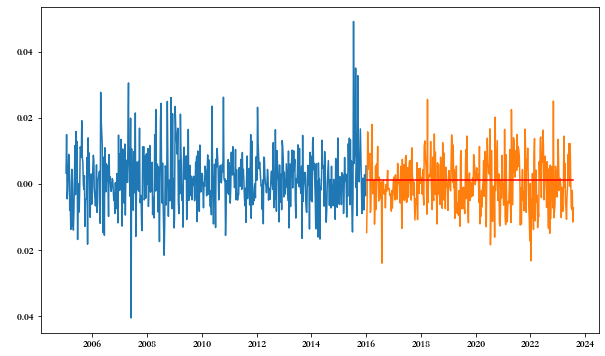

In [14]:
forecast_df = pd.DataFrame(index=test_data.index)
for factor_col in factor_cols:
    model = auto_arima(train_data[factor_col], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    print(f"Model summary for {factor_col}:")
    print(model.summary())
    model.fit(train_data[factor_col])
    forecast_steps = len(test_data)
    forecast, _ = model.predict(n_periods=forecast_steps, return_conf_int=True)

    forecast_df[factor_col + '_forecast'] = forecast
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[factor_col], label='Train Data')
    plt.plot(test_data.index, test_data[factor_col], label='Test Data')
    plt.plot(test_data.index, forecast, label='Forecast', color='red')
    plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.2)
    plt.legend()
    plt.title(f'Auto ARIMA Forecast for {factor_col}')
    plt.show()


In [15]:
all_results

,Factor,Forecast,Lower_CI,Upper_CI
0,Beta,0.000911,-0.015411,0.017233
1,Beta,0.000911,-0.015411,0.017233
2,Beta,0.000911,-0.015411,0.017233
3,Beta,0.000911,-0.015411,0.017233
4,Beta,0.000911,-0.015411,0.017233
5,Size,0.001128,-0.010005,0.012261
6,Size,0.001543,-0.009678,0.012765
7,Size,0.001582,-0.009651,0.012815
8,Size,0.001586,-0.009655,0.012826
9,Size,0.001586,-0.009662,0.012834


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

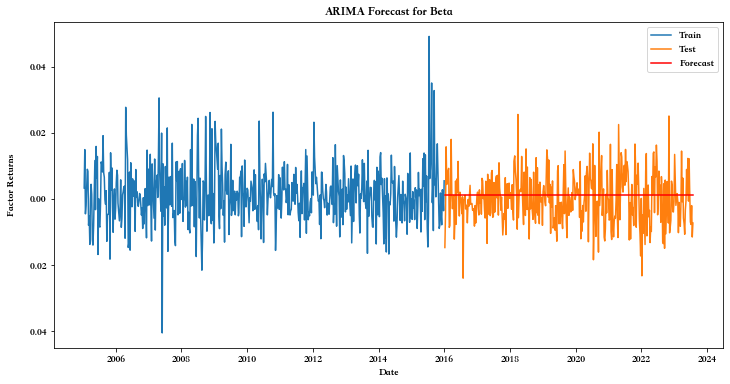

Root Mean Squared Error (RMSE) for Beta: 0.007927605876656743


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

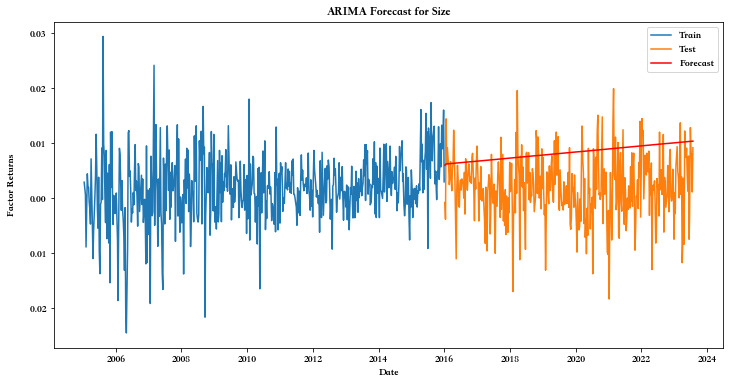

Root Mean Squared Error (RMSE) for Size: 0.008655053504405949


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

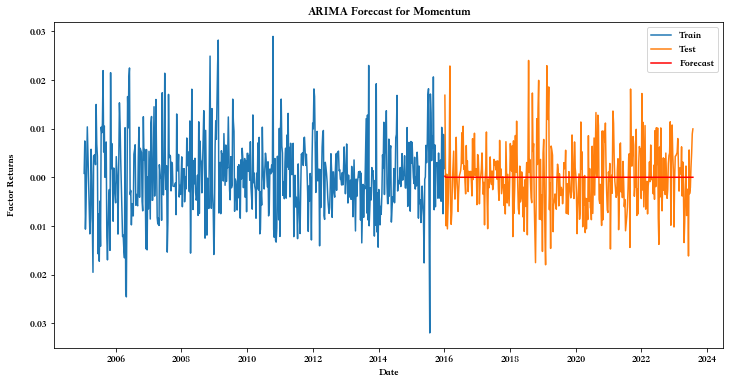

Root Mean Squared Error (RMSE) for Momentum: 0.006757227047897481


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

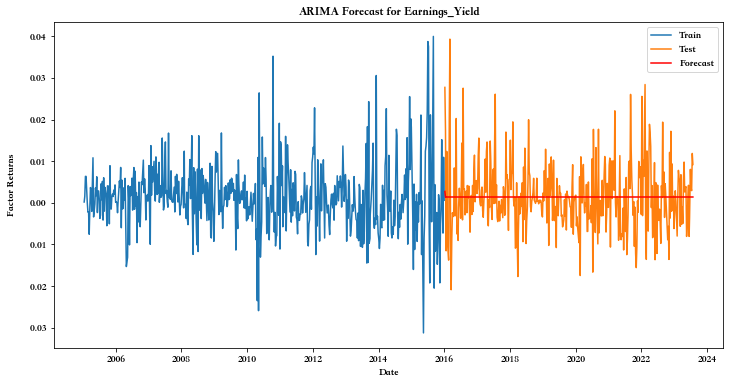

Root Mean Squared Error (RMSE) for Earnings_Yield: 0.008123623403273036


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with a

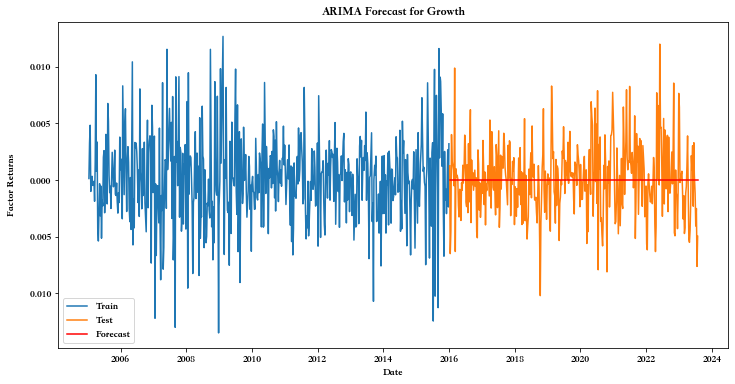

Root Mean Squared Error (RMSE) for Growth: 0.0031809090166375438


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

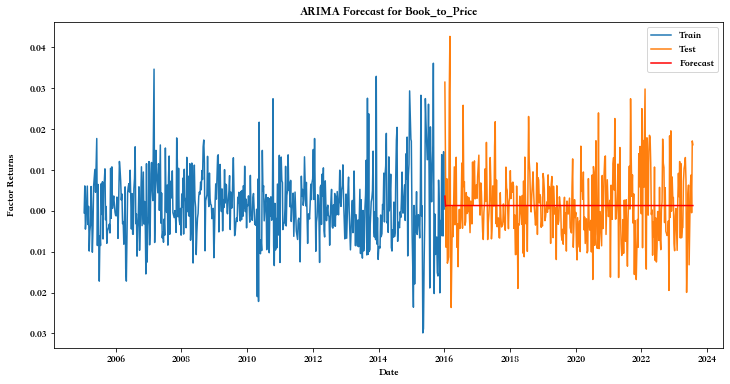

Root Mean Squared Error (RMSE) for Book_to_Price: 0.009035588634227047


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

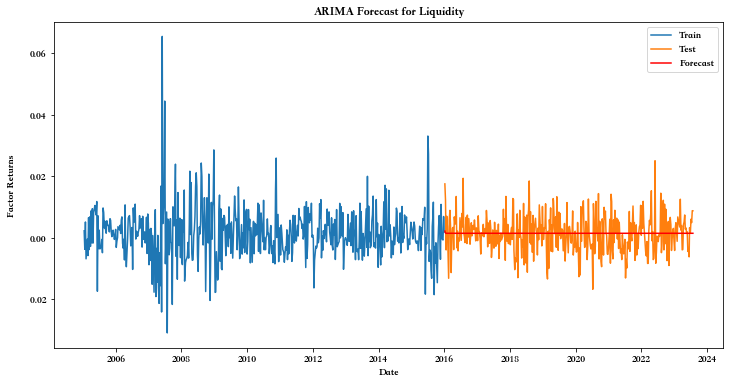

Root Mean Squared Error (RMSE) for Liquidity: 0.006103979732299046


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

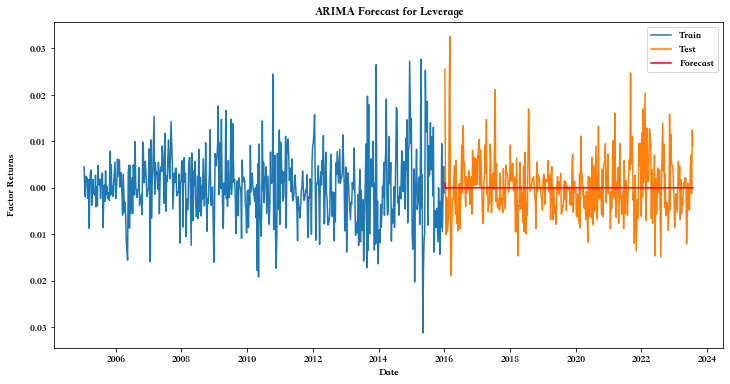

Root Mean Squared Error (RMSE) for Leverage: 0.006515236921539052


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

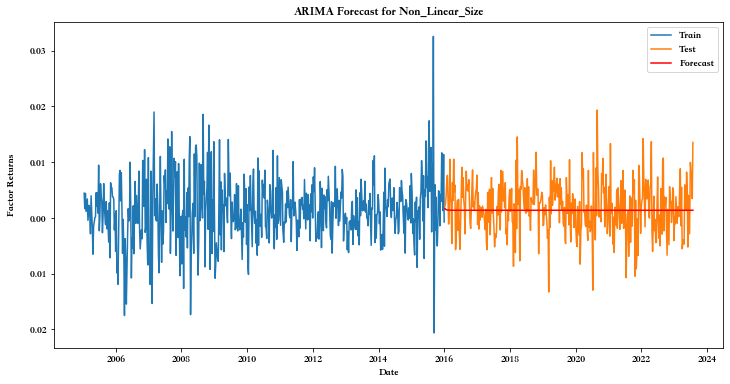

Root Mean Squared Error (RMSE) for Non_Linear_Size: 0.004695557093401644


/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

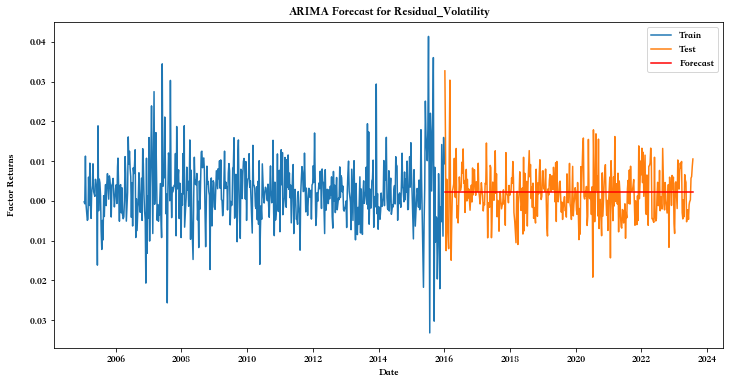

Root Mean Squared Error (RMSE) for Residual_Volatility: 0.0062171584905001765
All Results:
                Beta      Size      Momentum  Earnings_Yield  Growth  \
Date                                                                   
2016-01-08  0.001282  0.005973  2.159365e-04        0.002733     0.0   
2016-01-15  0.001282  0.006196  2.611963e-05        0.001317     0.0   
2016-01-22  0.001282  0.006222  3.159425e-06        0.001396     0.0   
2016-01-29  0.001282  0.006233  3.821634e-07        0.001396     0.0   
2016-02-05  0.001282  0.006244  4.622641e-08        0.001396     0.0   
...              ...       ...           ...             ...     ...   
2023-06-30  0.001282  0.010334  0.000000e+00        0.001396     0.0   
2023-07-07  0.001282  0.010345  0.000000e+00        0.001396     0.0   
2023-07-14  0.001282  0.010356  0.000000e+00        0.001396     0.0   
2023-07-21  0.001282  0.010367  0.000000e+00        0.001396     0.0   
2023-07-28  0.001282  0.010377  0.000000e+00 

In [16]:
all_results = pd.DataFrame()

for factor_column in factor_cols:
    train_data = data[train_start:train_end][factor_column]
    test_data = data[test_start:test_end][factor_column]
    
    model = auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)
    model_fit = model.fit(train_data)
    
    forecast_steps = len(test_data)
    forecast = model_fit.predict(n_periods=forecast_steps)
    
    rmse = np.sqrt(mean_squared_error(test_data, forecast))

    forecast_dates = test_data.index

    temp_df = pd.DataFrame({'Date': forecast_dates,
                            factor_column: forecast})
    temp_df.set_index('Date', inplace=True)

    all_results = pd.concat([all_results, temp_df], axis=1)

    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Train')
    plt.plot(test_data.index, test_data, label='Test')
    plt.plot(test_data.index, forecast, label='Forecast', color='red')
    plt.title('ARIMA Forecast for {}'.format(factor_column))
    plt.xlabel('Date')
    plt.ylabel('Factor Returns')
    plt.legend()
    plt.show()

    print("Root Mean Squared Error (RMSE) for {}: {}".format(factor_column, rmse))

print("All Results:")
print(all_results)

In [17]:
all_results

,Beta,Size,Momentum,Earnings_Yield,Growth,Book_to_Price,Liquidity,Leverage,Non_Linear_Size,Residual_Volatility
Date,,,,,,,,,,
2016-01-08,0.001282,0.005973,2.159365e-04,0.002733,0.0,0.003601,0.002220,0.001072,0.001695,0.002316
2016-01-15,0.001282,0.006196,2.611963e-05,0.001317,0.0,0.001135,0.001582,-0.000198,0.001567,0.002316
2016-01-22,0.001282,0.006222,3.159425e-06,0.001396,0.0,0.001297,0.001517,0.000000,0.001489,0.002316
2016-01-29,0.001282,0.006233,3.821634e-07,0.001396,0.0,0.001297,0.001517,0.000000,0.001442,0.002316
2016-02-05,0.001282,0.006244,4.622641e-08,0.001396,0.0,0.001297,0.001517,0.000000,0.001413,0.002316
...,...,...,...,...,...,...,...,...,...,...
2023-06-30,0.001282,0.010334,0.000000e+00,0.001396,0.0,0.001297,0.001517,0.000000,0.001369,0.002316
2023-07-07,0.001282,0.010345,0.000000e+00,0.001396,0.0,0.001297,0.001517,0.000000,0.001369,0.002316
2023-07-14,0.001282,0.010356,0.000000e+00,0.001396,0.0,0.001297,0.001517,0.000000,0.001369,0.002316
